# <b> PELEGANT output analysis tool

PP - V 2024.01.30

## Initialization, formating and useful path

In [1]:
import sys 
import subprocess
from matplotlib import rc
import os 
sys.path.insert(0, '/lstr/sahara/aard/cphillips/ipynbfiles/conversion')
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import eleganttool2
from eleganttool2 import import_numericaldata
from IPython.display import display, Markdown

# install directories for PELEGANT and SDDS tools (should not be needed)
sddspath='/lstr/sahara/aard/philippe/codes/pelegant_metis/epics/extensions/bin/linux-x86_64/'
appspath='/lstr/sahara/aard/philippe/codes/pelegant_metis/oag/apps/bin/linux-x86_64/'

FontSize=16
          
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', size = FontSize)
#rc('figure.figsize', [10, 5])

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

PWD=subprocess.run('pwd',stdout=subprocess.PIPE)
PWD.stdout

cms = sp.constants.speed_of_light
mm=1e3

## Check sdds file used in the &sdds_beam input in PELEGANT

In [2]:
base = '/lstr/sahara/aard/cphillips/'

direc = base+'1nC/1beam/2Ele/'
#direc = base+'2nC/1beam/2Ele/'
#direc = base+'5nC/1beam/2Ele/'

case = direc+'y42ch/' # y42ch or y42end

rtname = 'y42chopt' # y42chopt or y42endopt
sddsfile = 'dist_10cm.sdds' #'dist_10cm.sdds'

input = case+sddsfile
print(input)

rootname = case+rtname

/lstr/sahara/aard/cphillips/1nC/1beam/2Ele/y42ch/dist_10cm.sdds


In [3]:
# If looking at end of LPS with no structure
#nsdirec = base+'1nC/1beam/2Ele/y42end/'
#nsdirec = base+'2nC/1beam/2Ele/y42end/'
#nsdirec = base+'5nC/1beam/2Ele/y42end/'

#nsdirec = base+'1nC/philippe_dist/2Ele/y42end/'

#case = nsdirec
#rtname = 'y42endopt'

avg x:  4.376551845829863e-07
avg y:  4.3690625674155843e-07
avg x:  4.0525716155162405e-07
avg y:  1.6275982798229944e-07
avg x:  3.7285913852026115e-07
avg y:  -1.1138660077695979e-07
avg x:  3.395226032813047e-07
avg y:  -3.93474556394491e-07
avg x:  3.373842751710447e-07
avg y:  -4.115687164725885e-07
avg x:  3.373842751710447e-07
avg y:  -4.115687164725885e-07
avg x:  3.2669263461974383e-07
avg y:  -5.020395168630746e-07
avg x:  3.1600099406844326e-07
avg y:  -5.925103172535606e-07
avg x:  3.1600099406844326e-07
avg y:  -5.925103172535606e-07
[19.5006072232231, 19.65212620409299, 19.803645184962882, 19.95955339702411, 19.969553923775955, 19.969553923775955, 20.019556557535186, 20.069559191294417, 20.069559191294417]


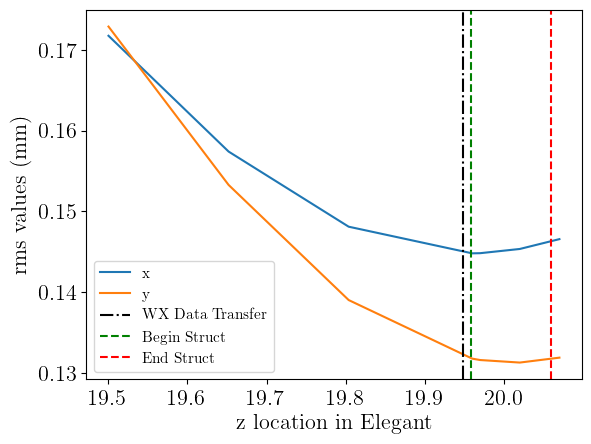

In [4]:
watch_rmsx = []
watch_rmsy = []
watch_avgz = []

beg_struct = 1.995850e+01
end_struct = beg_struct+.1
getdata = beg_struct - 0.01

filenames = [rootname+'.w10',rootname+'.w11',rootname+'.w12',rootname+'.wx',rootname+'.w13',rootname+'.w1',rootname+'.w2',rootname+'.w3',rootname+'.wend']
for i in np.arange(len(filenames)):
    x  = import_numericaldata(filenames[i], column='x')
    avgx = np.mean(x)
    print('avg x: ',avgx)
    insidex = [(ui - avgx)**2 for ui in x]
    rmsx = np.sqrt(np.sum(insidex)/len(x))*mm
    y  = import_numericaldata(filenames[i], column='y')
    avgy = np.mean(y)
    print('avg y: ',avgy)
    insidey = [(ui - avgy)**2 for ui in y]
    rmsy = np.sqrt(np.sum(insidey)/len(y))*mm
    ts  = import_numericaldata(filenames[i], column='t')
    avgt = np.mean(ts)
    avgz = avgt*cms
    watch_rmsx.append(rmsx)
    watch_rmsy.append(rmsy)
    watch_avgz.append(avgz)
print(watch_avgz)
plt.plot(watch_avgz,watch_rmsx,label='x')
plt.plot(watch_avgz,watch_rmsy,label='y')
plt.axvline(x = getdata,color='k',linestyle='dashdot',label='WX Data Transfer')
plt.axvline(x = beg_struct,color='g',linestyle = 'dashed',label = 'Begin Struct')
plt.axvline(x = end_struct,color='r',linestyle = 'dashed',label = 'End Struct')
plt.xlabel('z location in Elegant')
plt.ylabel('rms values (mm)')
plt.legend(fontsize=11)
plt.show()

['2.006850297533030e+01'] ['4.929873871997810e+01']
Going into Elegant
1
number of macroparticles: 30000


<Figure size 400x400 with 0 Axes>

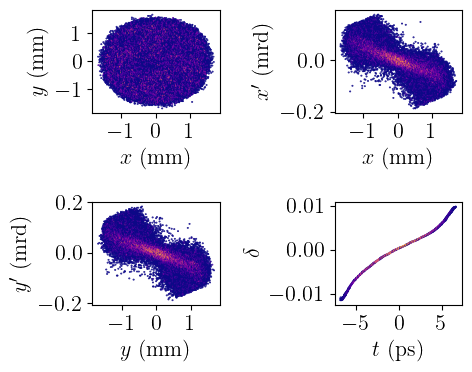

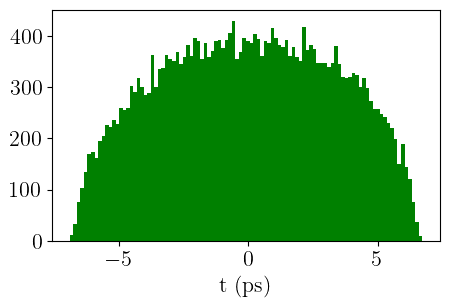

[5.36018528e-12 5.12309797e-12 6.24157715e-12 5.10364771e-12
 6.08326628e-12 5.78819393e-12 5.94223278e-12 5.45878869e-12
 6.26072918e-12 6.33129691e-12 6.55892638e-12 6.33409203e-12
 5.50875654e-12 5.72978470e-12 6.48939480e-12]
Going into Structure
rms x and y:  0.00014480922852136796 0.00013178522907689112
1
number of macroparticles: 30000


<Figure size 400x400 with 0 Axes>

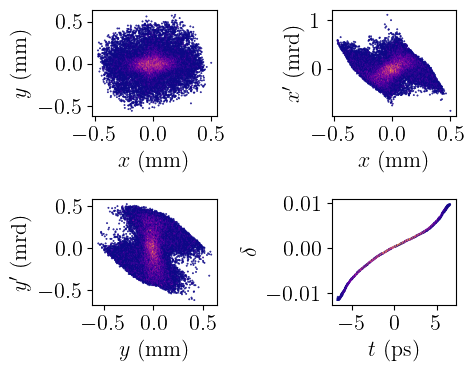

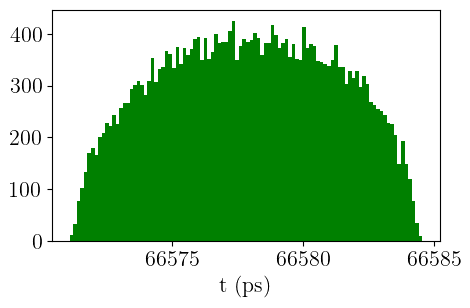

[6.65832472e-08 6.65829965e-08 6.65840886e-08 6.65829649e-08
 6.65839426e-08 6.65836381e-08 6.65837916e-08 6.65833208e-08
 6.65841029e-08 6.65841758e-08 6.65843992e-08 6.65841728e-08
 6.65833732e-08 6.65835803e-08 6.65843329e-08]
At end of structure within Elegant
1
number of macroparticles: 30000
min/max in x:  -0.0004701951313583713 0.0004996099308864254
min/max in y:  -0.0005582005418717054 0.0005813978061950859
min/max in z:  -0.0020402606551558995 0.0019938121937365396


<Figure size 400x400 with 0 Axes>

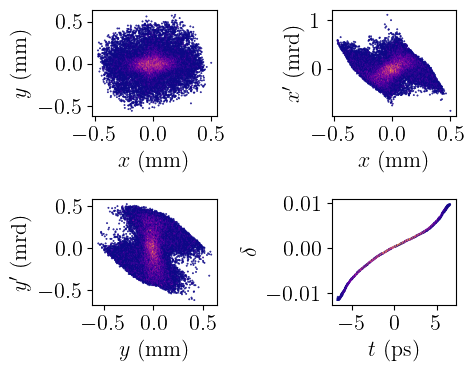

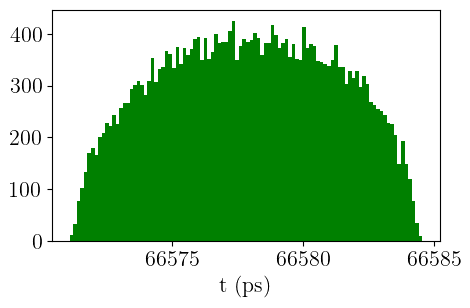

[6.65832472e-08 6.65829965e-08 6.65840886e-08 6.65829649e-08
 6.65839426e-08 6.65836381e-08 6.65837916e-08 6.65833208e-08
 6.65841029e-08 6.65841758e-08 6.65843992e-08 6.65841728e-08
 6.65833732e-08 6.65835803e-08 6.65843329e-08]


In [13]:
Keavg = eleganttool2.import_strdata(rootname+'.fin', column='KAverage')
savg = eleganttool2.import_strdata(rootname+'.fin', column='Cs')
print(savg,Keavg)

filename = case+sddsfile
nBins=201
rmCorrLPS=0
frac=100

print(color.BOLD + 'Going into Elegant' + color.END)

plt.figure(figsize=(4, 4))
x  = import_numericaldata(filename, column='x')
xp = import_numericaldata(filename, column='xp') # xp/zp
y  = import_numericaldata(filename, column='y')
yp = import_numericaldata(filename, column='yp') # yp/zp
ts  = import_numericaldata(filename, column='t')
t  = ts - ts.mean()
p  = import_numericaldata(filename, column='p') # gamma*beta
p  = p/p.mean()-1
if rmCorrLPS>0: 
   cc = np.polyfit (t,p,int(rmCorrLPS))
   p  = p - np.polyval(cc,t)
MinCnt = 1+int(len(t)-frac/100*len(t))
print (MinCnt)
print ('number of macroparticles:', len(t))
fig, axlist = plt.subplots(2,2, figsize=(5,4))
ax = axlist[0, 0]
ax.hexbin(x*1e3, y*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$y$ (mm)')
ax = axlist[0, 1]
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$x\'$ (mrd)')
ax.hexbin(x*1e3, xp*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,0]
ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$y\'$ (mrd)')
ax.hexbin(y*1e3, yp*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,1]
ax.hexbin(t*1e12, p, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$t$ (ps)')
ax.set_ylabel(r'$\delta$')
plt.tight_layout()

plt.figure(figsize=(5,3))
plt.hist(ts*1e12,bins=100,color='g')
plt.xlabel('t (ps)')
plt.show()
print(ts[:15])



print(color.BOLD + 'Going into Structure' + color.END)
filename = rootname+'.wx'
plt.figure(figsize=(4, 4))
x  = import_numericaldata(filename, column='x')
xp = import_numericaldata(filename, column='xp')
y  = import_numericaldata(filename, column='y')
yp = import_numericaldata(filename, column='yp')
ts  = import_numericaldata(filename, column='t')
t  = ts - ts.mean()
p  = import_numericaldata(filename, column='p')
p  = p/p.mean()-1

# calc rms x and y
sumx = 0
sumy = 0
for i in np.arange(len(x)):
    sumx = sumx + x[i]**2
    sumy = sumy + y[i]**2
rmsx = np.sqrt(sumx/len(x))
rmsy = np.sqrt(sumy/len(y))
print('rms x and y: ',rmsx,rmsy)

if rmCorrLPS>0: 
   cc = np.polyfit (t,p,int(rmCorrLPS))
   p  = p - np.polyval(cc,t)
MinCnt = 1+int(len(t)-frac/100*len(t))
print (MinCnt)
print ('number of macroparticles:', len(t))
fig, axlist = plt.subplots(2,2, figsize=(5,4))
ax = axlist[0, 0]
ax.hexbin(x*1e3, y*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$y$ (mm)')
ax = axlist[0, 1]
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$x\'$ (mrd)')
ax.hexbin(x*1e3, xp*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,0]
ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$y\'$ (mrd)')
ax.hexbin(y*1e3, yp*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,1]
ax.hexbin(t*1e12, p, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$t$ (ps)')
ax.set_ylabel(r'$\delta$')
plt.tight_layout()
#plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/1bunchEle.png')
plt.show()

plt.figure(figsize=(5,3))
plt.hist(ts*1e12,bins=100,color='g')
plt.xlabel('t (ps)')
plt.show()
print(ts[:15])



print(color.BOLD + 'At end of structure within Elegant' + color.END)

plt.figure(figsize=(4, 4))
x  = import_numericaldata(filename, column='x')
xp = import_numericaldata(filename, column='xp')
y  = import_numericaldata(filename, column='y')
yp = import_numericaldata(filename, column='yp')
ts  = import_numericaldata(filename, column='t')
t  = ts - ts.mean()
zs = t*cms
p  = import_numericaldata(filename, column='p')
p  = p/p.mean()-1
if rmCorrLPS>0: 
   cc = np.polyfit (t,p,int(rmCorrLPS))
   p  = p - np.polyval(cc,t)
MinCnt = 1+int(len(t)-frac/100*len(t))
print (MinCnt)
print ('number of macroparticles:', len(t))
print('min/max in x: ',min(x),max(x))
print('min/max in y: ',min(y),max(y))
print('min/max in z: ',min(zs),max(zs))
fig, axlist = plt.subplots(2,2, figsize=(5,4))
ax = axlist[0, 0]
ax.hexbin(x*1e3, y*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$y$ (mm)')
ax = axlist[0, 1]
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$x\'$ (mrd)')
ax.hexbin(x*1e3, xp*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,0]
ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$y\'$ (mrd)')
ax.hexbin(y*1e3, yp*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,1]
ax.hexbin(t*1e12, p, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$t$ (ps)')
ax.set_ylabel(r'$\delta$')
plt.tight_layout()

plt.figure(figsize=(5,3))
plt.hist(ts*1e12,bins=100,color='g')
plt.xlabel('t (ps)')
plt.show()
print(ts[:15])

In [6]:
# dump formated table for beam parameter
Z1, Z2, Z3=eleganttool2.dumpParam(input)
display(Markdown(Z1))
display(Markdown(Z2))
display(Markdown(Z3))

<table style="width:100%">  <caption>Printout for SDDS file tmpsab</caption>  <tr>    <th>pAverage</th>    <th>St</th>    <th>Sdelta</th>    <th>s56</th>  </tr>  <tr>    <th></th>    <th>s</th>    <th></th>    <th>s</th>  </tr>  <tr bgcolor="#ddd">    <td style="text-align:center">9.747007e+01</td>    <td style="text-align:center">3.312192e-12</td>    <td style="text-align:center">4.101015e-03</td>    <td style="text-align:center">1.341942e-14</td>  </tr></table><br>

<table style="width:100%">  <caption>Printout for SDDS file tmpsab</caption>  <tr>    <th>enx</th>    <th>ecnx</th>    <th>alphax</th>    <th>betax</th>  </tr>  <tr>    <th>m</th>    <th>m</th>    <th></th>    <th>m</th>  </tr>  <tr bgcolor="#ddd">    <td style="text-align:center">2.821141e-06</td>    <td style="text-align:center">2.821098e-06</td>    <td style="text-align:center">1.199347e+00</td>    <td style="text-align:center">2.062792e+01</td>  </tr></table><br>

<table style="width:100%">  <caption>Printout for SDDS file tmpsab</caption>  <tr>    <th>eny</th>    <th>ecny</th>    <th>alphay</th>    <th>betay</th>  </tr>  <tr>    <th>m</th>    <th>m</th>    <th></th>    <th>m</th>  </tr>  <tr bgcolor="#ddd">    <td style="text-align:center">2.832090e-06</td>    <td style="text-align:center">2.831011e-06</td>    <td style="text-align:center">1.162469e+00</td>    <td style="text-align:center">2.013344e+01</td>  </tr></table><br>

## Example: plot beta function along beamline

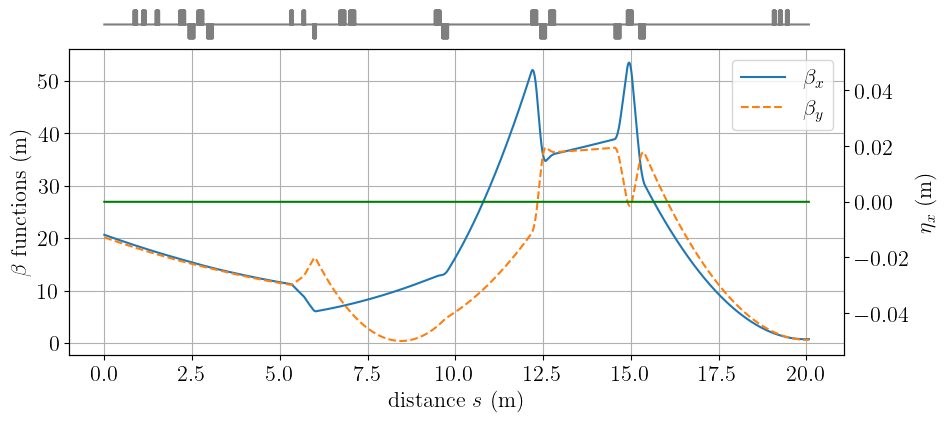

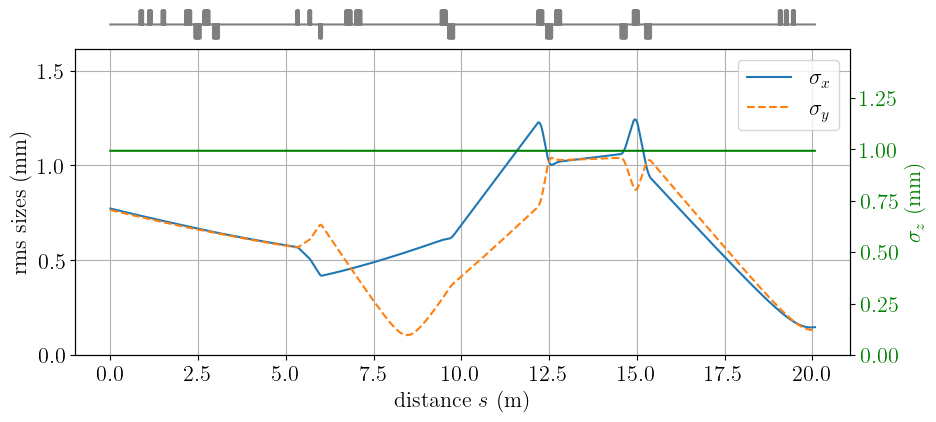

In [7]:
rootname = case+rtname
# the eleganttool functions will look for rootname+'.twi' +'.s' 
eleganttool2.plotCS(rootname, eta=True)
eleganttool2.plotSize(rootname)

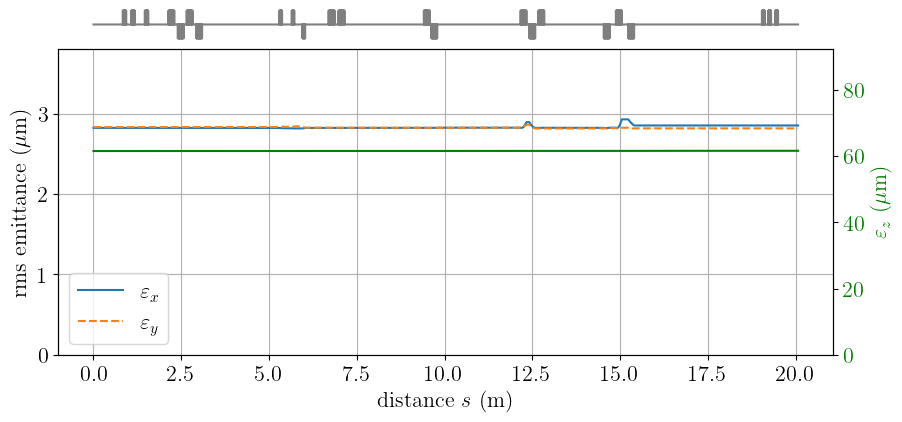

In [8]:
eleganttool2.plotEmit(rootname)

In [9]:
# Getting the beta, rms, and emittance at the start of the structure
filename = rootname
stwi = eleganttool2.import_numericaldata(filename+'.twi')
bx = eleganttool2.import_numericaldata(filename+'.twi', column='betax')
by = eleganttool2.import_numericaldata(filename+'.twi', column='betay')
print(stwi[-20:-15])


Sx = 1e3*eleganttool2.import_numericaldata(filename+'.s', column='Sx')
Sy = 1e3*eleganttool2.import_numericaldata(filename+'.s', column='Sy')
s = eleganttool2.import_numericaldata(filename+'.s', column='s')
SS = 1e3*eleganttool2.import_numericaldata(filename+'.s', column='Ss')
ex = 1e6*eleganttool2.import_numericaldata(filename+'.s', column='ecnx')
ey = 1e6*eleganttool2.import_numericaldata(filename+'.s', column='ecny')
print(s[-30:-20])
print(s[-29])


outx = eleganttool2.import_numericaldata(filename+'.out',column='x')
outy = eleganttool2.import_numericaldata(filename+'.out',column='y')
print(np.mean(outx))
print(np.mean(outy))

#### This is for if we're in area 2
# end is at 20.018502 m?
# Beginning of structure is @ -150 mm from end
matchs = 20.018502-.150
print(matchs)

print('Beginning of structure is at ',matchs)
print('RMS X = ', Sx[-29], "mm")
print('RMS Y = ', Sy[-29], "mm")
print('RMS S = ', SS[-29], "mm")
print('Eta x = ', ex[-29], "mu m")
print('Eta y = ', ey[-29], "mu m")
print('Beta x = ', bx[-29], "m")
print('Beta y = ', by[-29], "m")


#### For if we're in LPS
print('Information at end of LPS')
print('RMS X = ', Sx[-1], "mm")
print('RMS Y = ', Sy[-1], "mm")
print('RMS S = ', SS[-1], "mm")
print('Eta x = ', ex[-1], "mu m")
print('Eta y = ', ey[-1], "mu m")
print('Beta x = ', bx[-1], "m")
print('Beta y = ', by[-1], "m")


[19.968502 19.968502 19.968502 19.978502 19.988502]
[19.9000395  19.90978325 19.919527   19.92927075 19.9390145  19.94875825
 19.958502   19.958502   19.968502   19.968502  ]
19.90978324999981
3.1600099406844326e-07
-5.925103172535606e-07
19.868502000000003
Beginning of structure is at  19.868502000000003
RMS X =  0.1451146676673765 mm
RMS Y =  0.1331448840166683 mm
RMS S =  0.9928627236057124 mm
Eta x =  2.851376073678347 mu m
Eta y =  2.815521114954544 mu m
Beta x =  0.7174523398617753 m
Beta y =  0.6176738604167091 m
Information at end of LPS
RMS X =  0.1465673316343082 mm
RMS Y =  0.1319063548223173 mm
RMS S =  0.9928622066694539 mm
Eta x =  2.851376073678347 mu m
Eta y =  2.815521114954544 mu m
Beta x =  0.7256761616738918 m
Beta y =  0.6056844529219906 m


In [10]:
def plotsummaryPSpace(filename,xlima,xlimb, ylima,ylimb,nBins=201,rmCorrLPS=0, frac=100):
    x  = import_numericaldata(filename, column='x')
    xp = import_numericaldata(filename, column='xp')
    y  = import_numericaldata(filename, column='y')
    yp = import_numericaldata(filename, column='yp')
    ts  = import_numericaldata(filename, column='t')
    t  = ts - ts.mean()
    p  = import_numericaldata(filename, column='p')
    p  = p/p.mean()-1
    if rmCorrLPS>0: 
       cc = np.polyfit (t,p,int(rmCorrLPS))
       p  = p - np.polyval(cc,t)
    MinCnt = 1+int(len(t)-frac/100*len(t))
    print (MinCnt)
    print ('number of macroparticles:', len(t))
    fig, axlist = plt.subplots(2,2, figsize=(10, 10))
    ax = axlist[0, 0]
    ax.hexbin(x*1e3, y*1e3, gridsize=nBins, mincnt=MinCnt, cmap='inferno_r')
    ax.set_xlim((xlima,xlimb))
    ax.set_ylim((ylima,ylimb))
    ax.set_xlabel('$x$ (mm)')
    ax.set_ylabel('$y$ (mm)')
    ax = axlist[0, 1]
    ax.set_xlabel('$x$ (mm)')
    ax.set_ylabel('$x\'$ (mrd)')
    ax.hexbin(x*1e3, xp*1e3, gridsize=nBins, mincnt=MinCnt, cmap='inferno_r')
    ax = axlist[1,0]
    ax.set_xlabel('$y$ (mm)')
    ax.set_ylabel('$y\'$ (mrd)')
    ax.hexbin(y*1e3, yp*1e3, gridsize=nBins, mincnt=MinCnt, cmap='inferno_r')
    ax = axlist[1,1]
    ax.hexbin(t*1e12, p, gridsize=nBins, mincnt=MinCnt, cmap='inferno_r')
    ax.set_xlabel('$t$ (ps)')
    ax.set_ylabel(r'$\delta$')
    plt.tight_layout()
    plt.figure()
    plt.hist(ts,bins=100)
    plt.show()
    print(ts[:15])

Start of Elegant Simulation
1
number of macroparticles: 30000


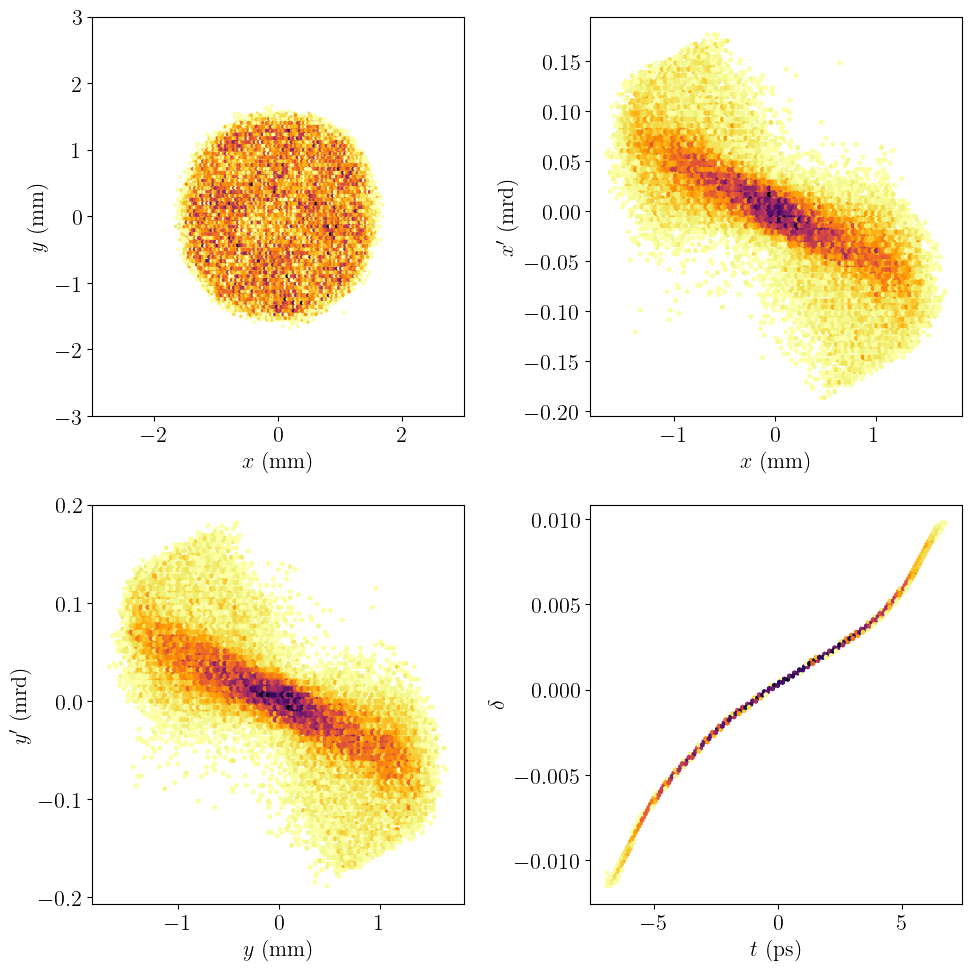

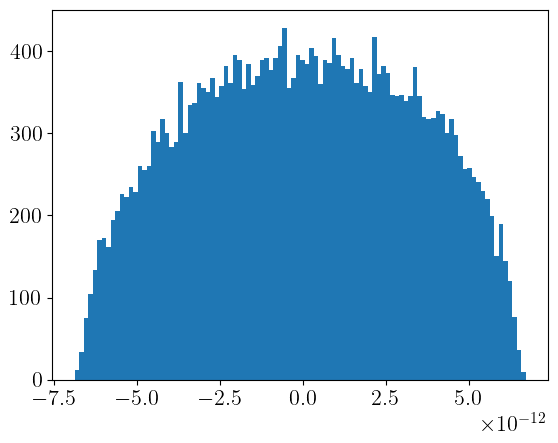

[5.36018528e-12 5.12309797e-12 6.24157715e-12 5.10364771e-12
 6.08326628e-12 5.78819393e-12 5.94223278e-12 5.45878869e-12
 6.26072918e-12 6.33129691e-12 6.55892638e-12 6.33409203e-12
 5.50875654e-12 5.72978470e-12 6.48939480e-12]
End of Elegant Simulation
1
number of macroparticles: 30000


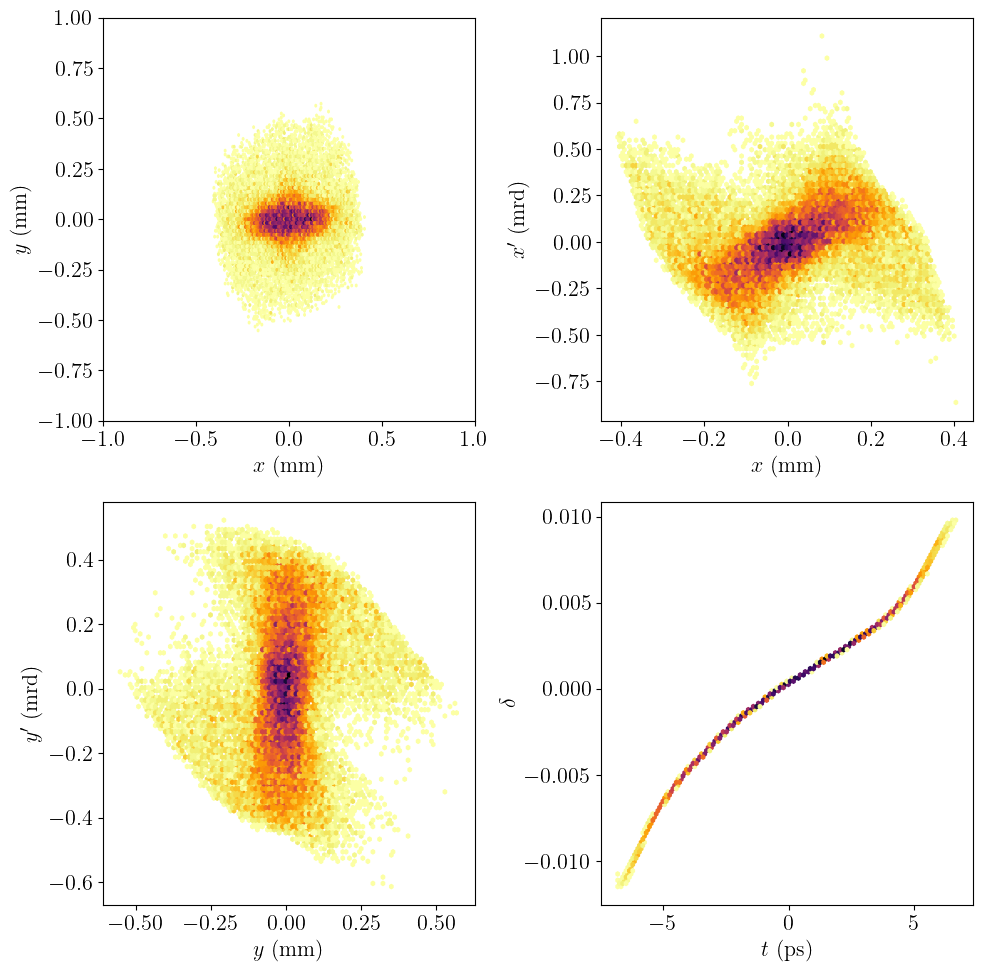

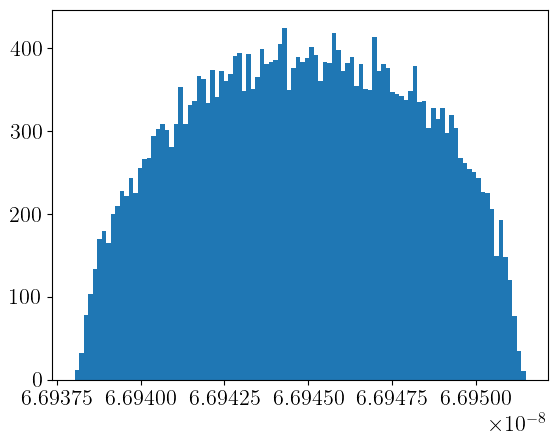

[6.69501869e-08 6.69499362e-08 6.69510281e-08 6.69499045e-08
 6.69508821e-08 6.69505777e-08 6.69507312e-08 6.69502604e-08
 6.69510424e-08 6.69511153e-08 6.69513387e-08 6.69511123e-08
 6.69503128e-08 6.69505198e-08 6.69512724e-08]
Beamsize at start of structure
1
number of macroparticles: 30000


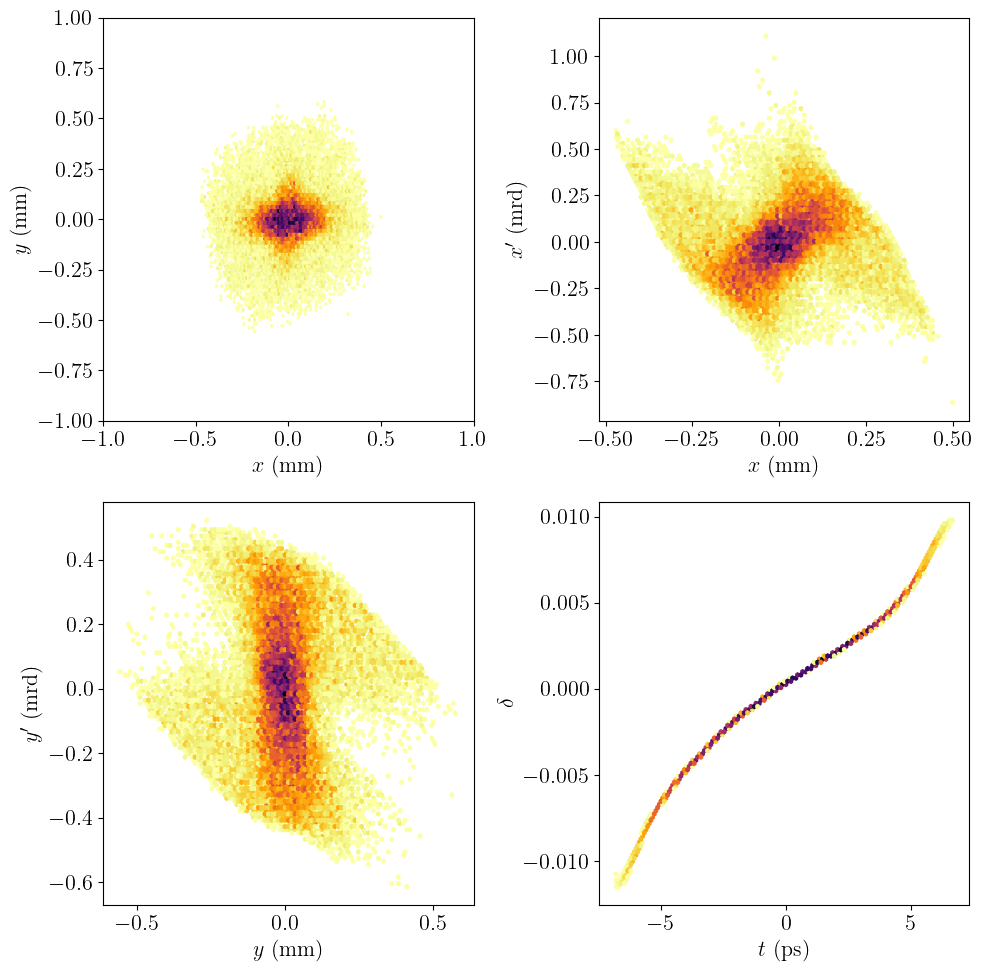

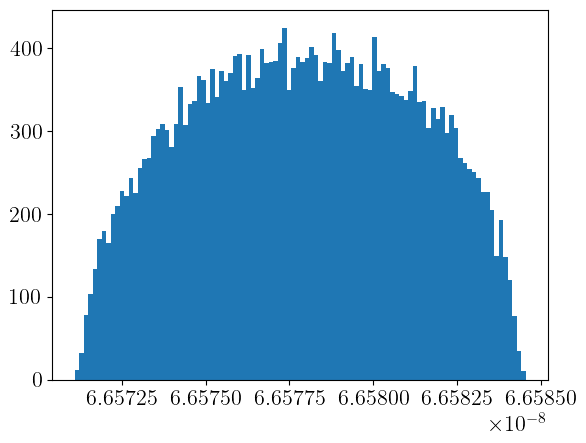

[6.65832472e-08 6.65829965e-08 6.65840886e-08 6.65829649e-08
 6.65839426e-08 6.65836381e-08 6.65837916e-08 6.65833208e-08
 6.65841029e-08 6.65841758e-08 6.65843992e-08 6.65841728e-08
 6.65833732e-08 6.65835803e-08 6.65843329e-08]


In [11]:
print('Start of Elegant Simulation')
#eleganttool2.plotsummaryPSpace(case+sddsfile, nBins=101)
plotsummaryPSpace(case+sddsfile,-3,3,-3,3, nBins=101)
print('End of Elegant Simulation')
#eleganttool2.plotsummaryPSpace(rootname+'.out', nBins=101)
plotsummaryPSpace(rootname+'.out', -1,1,-1,1,nBins=101)
print('Beamsize at start of structure')
#eleganttool2.plotsummaryPSpace(rootname+'.wx', nBins=101)
plotsummaryPSpace(rootname+'.wx', -1,1,-1,1,nBins=101)